In [4]:
library(classInt)
library(RColorBrewer)
library(grid)
library(rgdal)
library(ggplot2)

In [8]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)

In [5]:
mpb10km_poly <- readOGR(dsn='/Users/dongmeichen/Documents/beetle/shp', 
                           layer='mpb10km')
mpb_projstr <- "+proj=laea +lon_0=-112.5 +lat_0=45 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
proj4string(mpb10km_poly) <- mpb_projstr
mpb10km_lines <- fortify(mpb10km_poly, region="SP_ID")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km"
with 17 features
It has 2 fields


Warning message in ReplProj4string(obj, CRS(value)):
“A new CRS was assigned to an object with an existing CRS:
+proj=laea +lat_0=45 +lon_0=-112.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0
without reprojecting.
For reprojection, use function spTransform”

In [6]:
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))

Warning message:
“Non Lab interpolation is deprecated”Warning message:
“Non Lab interpolation is deprecated”Warning message:
“Non Lab interpolation is deprecated”

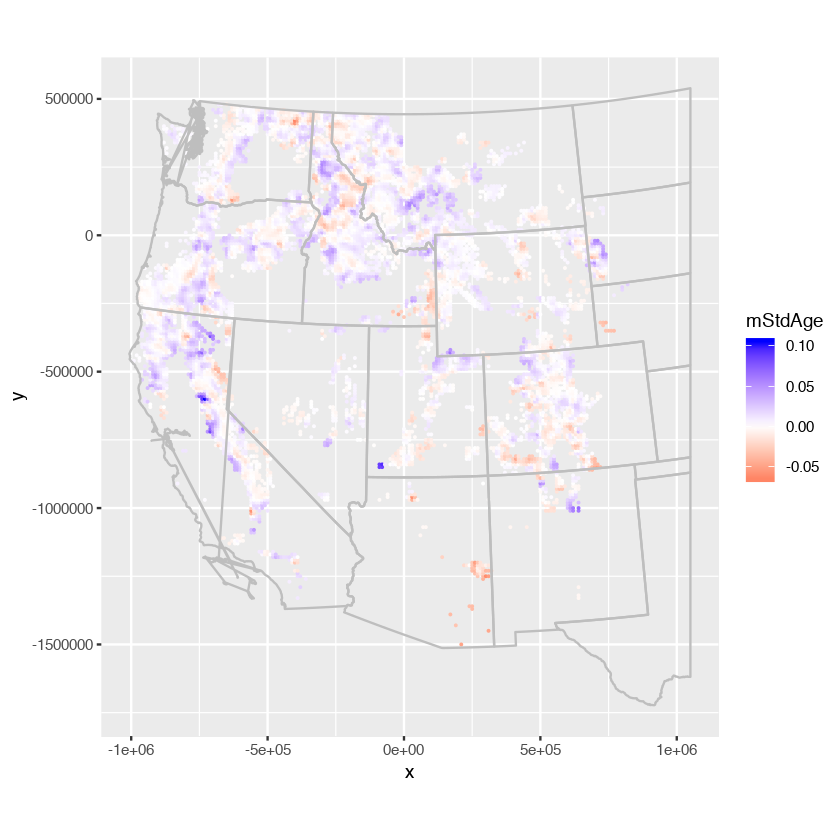

Warning message:
“Non Lab interpolation is deprecated”

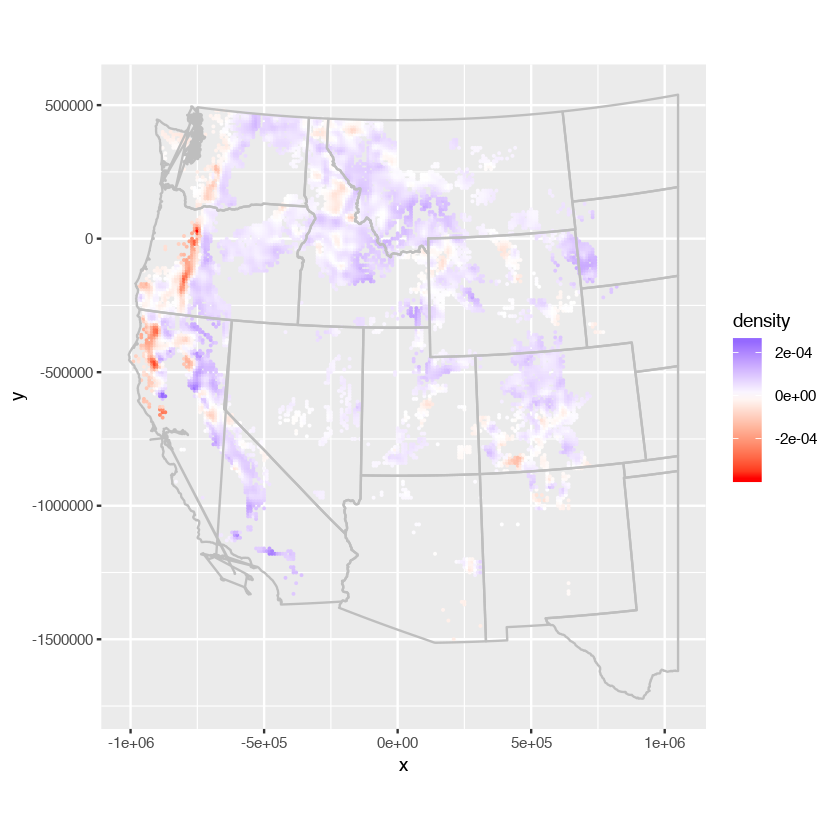

Warning message:
“Non Lab interpolation is deprecated”

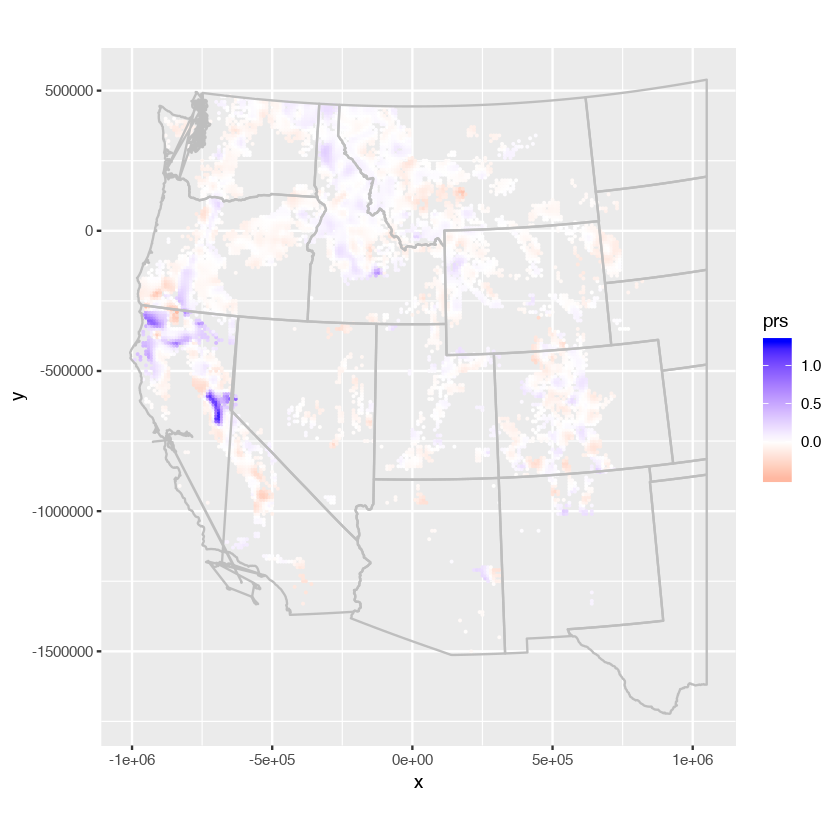

Warning message:
“Non Lab interpolation is deprecated”

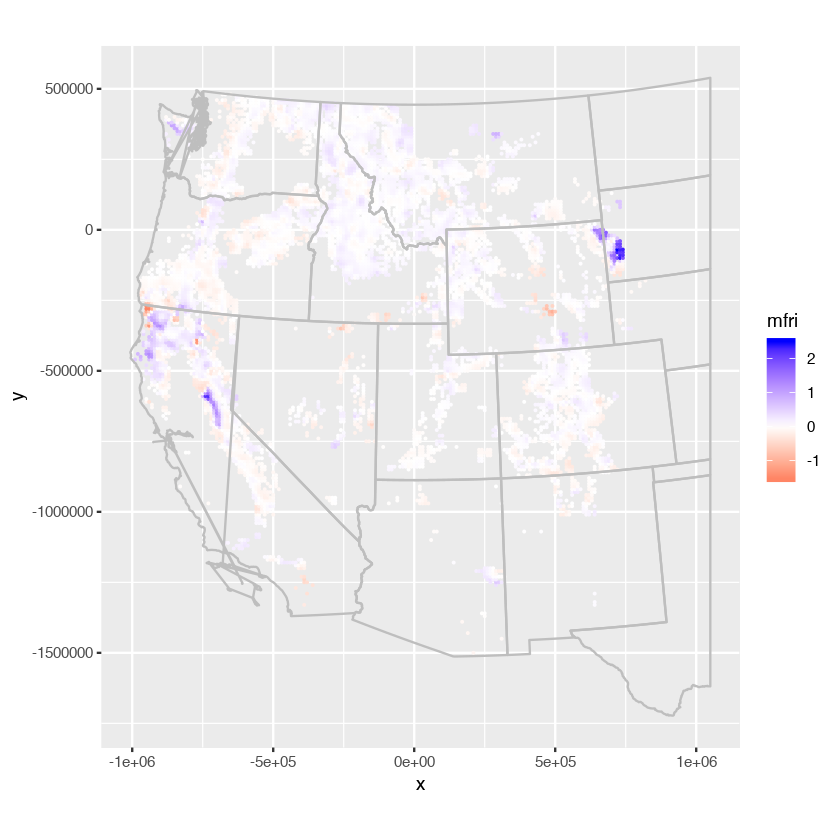

Warning message:
“Non Lab interpolation is deprecated”

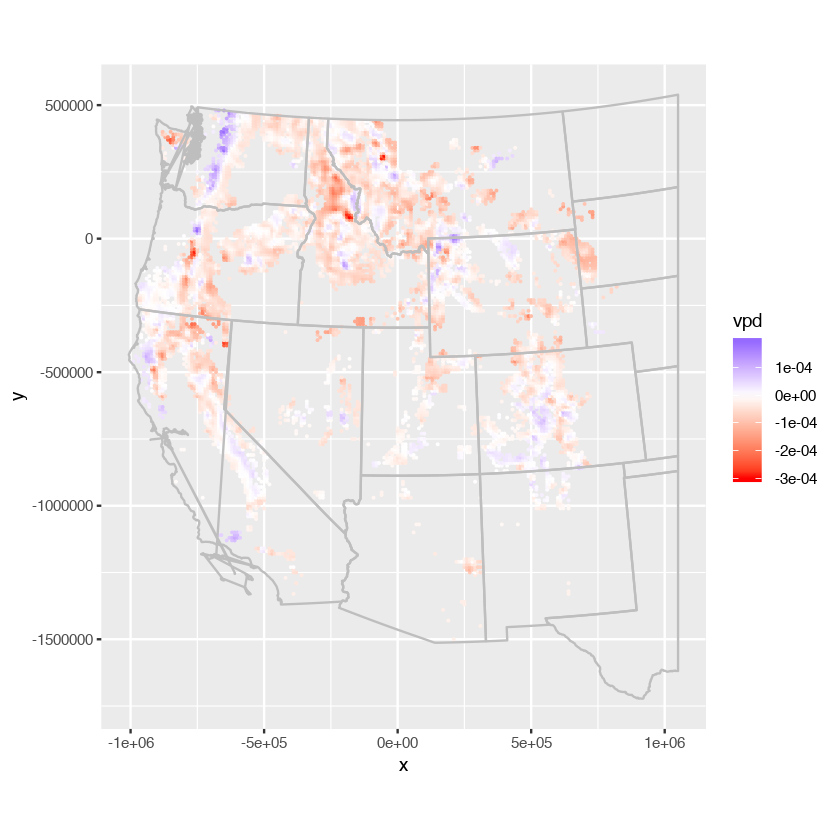

Warning message:
“Non Lab interpolation is deprecated”

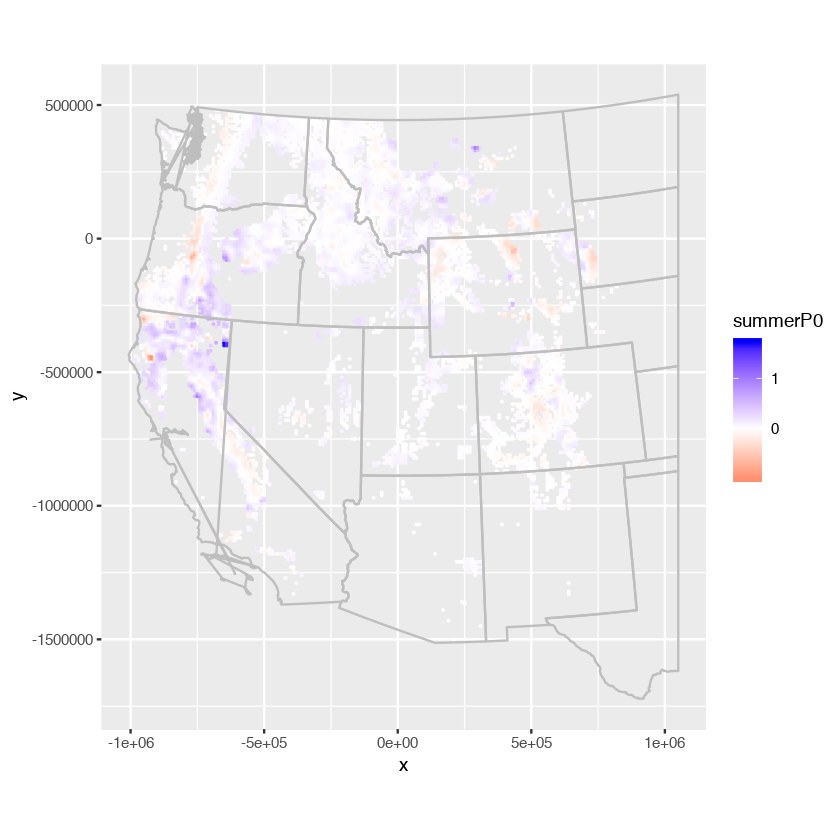

Warning message:
“Non Lab interpolation is deprecated”

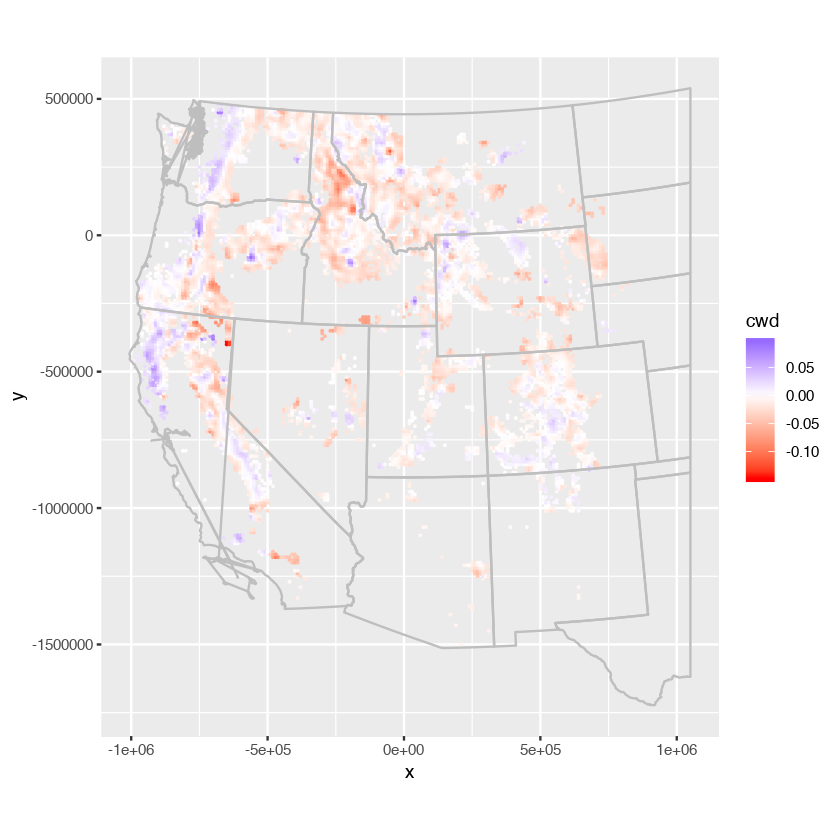

Warning message:
“Non Lab interpolation is deprecated”

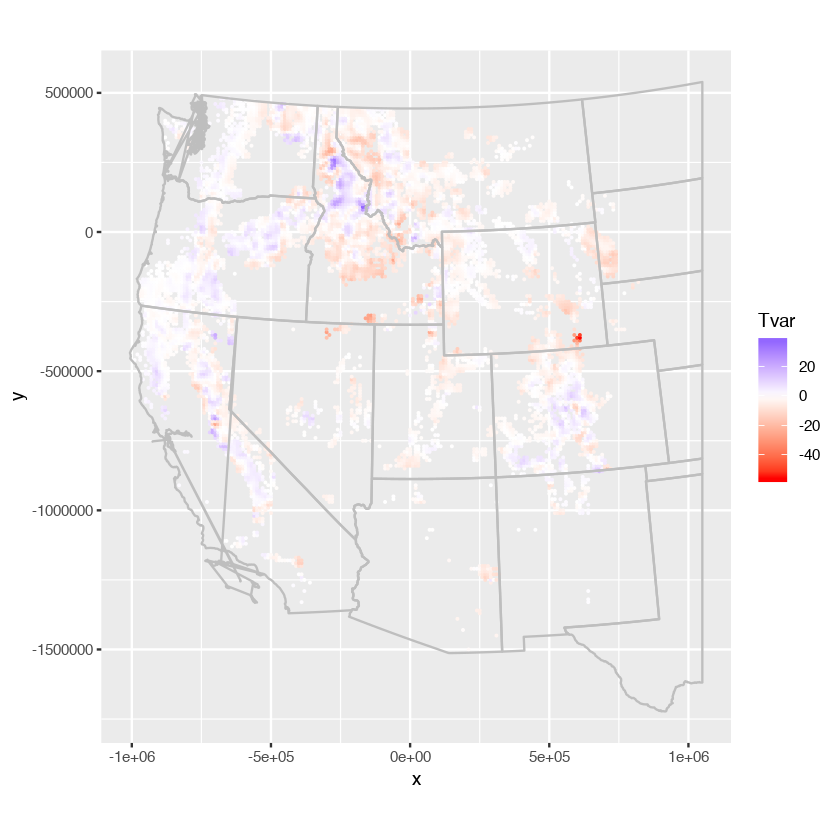

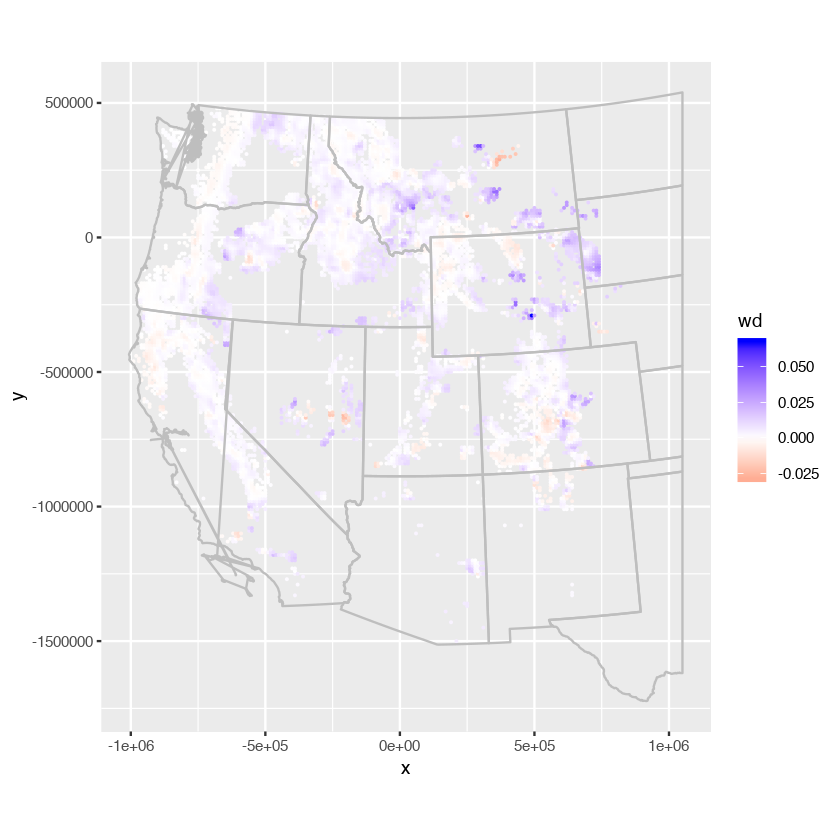

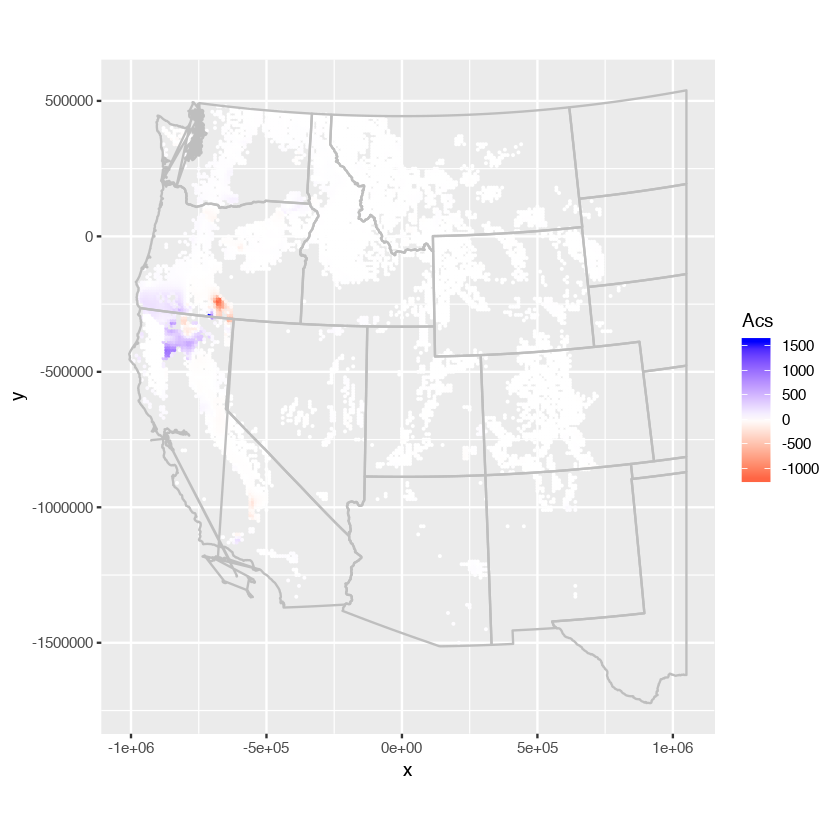

In [9]:
vars <- c('mStdAge', 'density', 'prs', 'mfri', 'vpd', 'summerP0', 'cwd', 'Tvar',
          'wd', 'Acs')
for(v in vars){
    results <- read.csv(sprintf('%s/gwr_results_wo_FIA_%s.csv', DATA, v))
    gwr.pt <- ggplot(xy, aes(x=x,y=y))+geom_point(aes(colour=results[,'var']), size=0.05)+
      scale_colour_gradient2(low = "red", mid = "white", high = "blue", midpoint = 0, space = "rgb", 
                         na.value = "grey50", guide = "colourbar", guide_legend(title=v))
    print(gwr.pt+geom_path(data=mpb10km_lines,aes(long, lat, group=id), colour="grey")+coord_equal())   
}